## k-NN

Dette dokument indeholder nogle implementationer af k-NN modellen med nogle tilhørende opgaver. Formålet er at give en intuition for hvordan modellen virker, så man har et eksempel på en klassisk machine learning model.

Det anbefales at bruge kapitlet om k-NN modellen fra kompendiet som opslagsværk til at forstå modellen på konceptplan, mens man forsøger at løse opgavere.

In [1]:
# Her er blot en celle til at importere pakker, før alt det andet kode bliver kørt
import numpy as np
import matplotlib.pyplot as plt
import math

#### Opgave 0

Dette er en ekstraopgave fra intro til programmering, som er et meget fint, men ikke nødvendigt udgangspunkt for resten af opgaverne her.

Opgave 0.1: Løs opgaven 12 på CodeJudge kaldet k nærmeste naboer.

#### Opgave 1 (svær)

Den første opgaver er at bygge sin egen implementation af k-NN modellen fra bunden af. Her kan man benytte sig af skelettet af kommentarer i nedenstående celle. Denne opgave er betydeligt sværere end resten af opgaverne i dokumentet, så spørg endelig om hjælp, eller spring over den, for eventuelt at vende tilbage til den senere.

1.1: Lav en implementation af k-NN algoritmen som beskrevet i kompendiet


In [2]:
# 1: Lav nogle klasser/labels, som data kan tilhøre


# 2: Lav et træningssæt, der er delt op i klasser/labels


# 3: Lav et testsæt


# 4: Lav en funktion der kører selve k-NN algoritmen


# 5: Plot og print resultater

Her kommer en implementation af k-NN algoritmen med 2 klasser, hvor træningsdataen for de 2 klasser med vilje er forskudt, sådan at det bliver tydeligt at se resultaterne af k-NN algoritmen. Cellerne nedenfor laver og plotter datasæt

In [3]:
# Her defineres en funktion til at generere datasæt
def generate_data():
    np.random.seed(0)
    # Klasse -1
    points_neg = np.random.randn(50, 2) - 2  # Flytter denne klump til venstre
    labels_neg = -1 * np.ones(50)

    # Klasse 1
    points_pos = np.random.randn(50, 2) + 2  # Flytter denne klump til højre
    labels_pos = np.ones(50)

    # Samle træningsdata
    training_points = np.vstack((points_neg, points_pos))
    training_labels = np.concatenate((labels_neg, labels_pos))

    # Generer nogle testdata
    #test_points = np.random.randn(20, 2)  # Testpunkter spredt omkring centrum
    test_points = np.random.choice(20, 1)
    
    return training_points, training_labels, test_points

training_points, training_labels, test_points = generate_data()

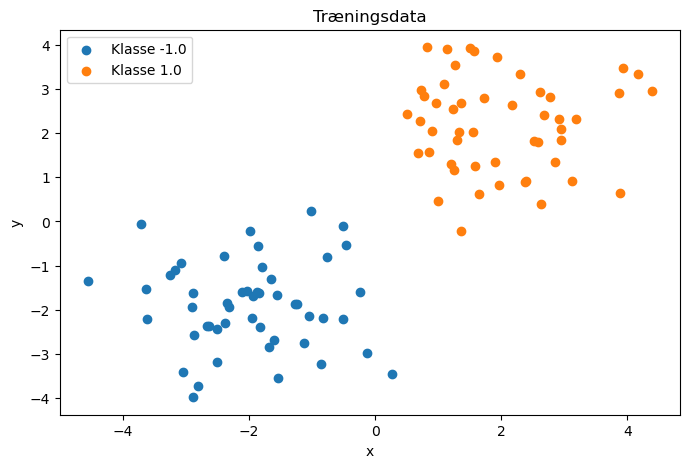

In [4]:
# Her defineres en funktion til at plotte træningsdata og testdata
def plot_training_data(training_points, training_labels):
    plt.figure(figsize=(8, 5))
    # Plot punkter baseret på deres /klasserlabels
    for label in np.unique(training_labels):
        # Vælg alle punkter med den aktuelle klasse/label
        subset = training_points[training_labels == label]
        plt.scatter(subset[:, 0], subset[:, 1], label=f'Klasse {label}')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('Træningsdata')
    plt.show()

plot_training_data(training_points, training_labels)

Her kommer en implementation af k-NN algoritmen, som anvender nogle programmeringstekniske koncepter, som i ikke er blevet introduceret til. Længere nede kan i finde en implementation, som bruger ting i har set før, men den er noget mere snørklet. 

In [5]:
# Her defineres selve k-NN algoritmen
def KNN_numpy(training_points, training_labels, test_points, k):
    
    classifications = []

    for test_point in test_points:
        # Beregner afstand mellem hvert testpunkt og træningspunkt
        differences = training_points - test_point
        euclidean_distances = np.sqrt(np.sum(differences**2, axis=1))

        sorted_indices = np.argsort(euclidean_distances, axis=0)

        num_positives = np.sum(training_labels[sorted_indices][:k] == 1)
        num_negatives = np.sum(training_labels[sorted_indices][:k] == -1)
        pred = -1 if num_negatives > num_positives else 1

        classifications.append(pred)

    return classifications

Her kommer en implementation af k-NN algoritmen, som anvender de koncepter i har set. Den er dog betydeligt mere omstændig, så det anbefales primært at bruge implementationen ovenfor

In [6]:
# Blot en funktion til at beregne distancer mellem punkter
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1 - x2) ** 2))
    return distance

# Her defineres selve k-NN algoritmen men med ting i har lært om før
def knn_classify(training_points, training_labels, test_points, k):
    predictions = []
    for test_point in test_points:
        distances = []
        for train_point in training_points:
            # Beregner distance mellem testpunkt og hvert træningspunkt 
            distance = euclidean_distance(test_point, train_point)
            distances.append(distance)

        # Opretter en liste med indices og distancer
        index_distance_pairs = []
        for i in range(len(distances)):
            pair = (i, distances[i])
            index_distance_pairs.append(pair)

        # Brug Pythons sort function/method i stedet for denne her sort
        # Sorterer indices efter distance
        for i in range(len(index_distance_pairs)):
            for j in range(i + 1, len(index_distance_pairs)):
                if index_distance_pairs[i][1] > index_distance_pairs[j][1]:
                    # Ombytter rækkefølge
                    index_distance_pairs[i], index_distance_pairs[j] = index_distance_pairs[j], index_distance_pairs[i]
        
        # Gemmer de k nærmeste indices fra den sorterede liste
        nearest_indices = []
        for i in range(k):
            index = index_distance_pairs[i][0]  # Hent indexet fra parret ved position 'i'
            nearest_indices.append(index)

        # Gemmer klasserne/labels fra de k nærmeste naboer
        nearest_labels = []
        for i in nearest_indices:
            nearest_labels.append(training_labels[i])

        # Tæl antallet af gange hver klasse/label optræder inden for de k naboer
        label_count = {}
        for label in nearest_labels:
            if label in label_count:
                label_count[label] += 1
            else:
                label_count[label] = 1
        
        # Bestemmer klasse/label for testpunktet baseret på den dominerende klasse/label blandt naboer
        max_count = -1
        predicted_label = None
        for label, count in label_count.items():
            if count > max_count:
                max_count = count
                predicted_label = label
        
        predictions.append(predicted_label)

    return predictions

In [7]:
#Her defineres en funktion der plotter resultaterne af k-NN algoritmen
def plot_knn_results(training_points, training_labels, test_points, predicted_labels):
    plt.figure(figsize=(8, 5))
    # Plot training points
    for label in np.unique(training_labels):
        subset = training_points[training_labels == label]
        plt.scatter(subset[:, 0], subset[:, 1], label=f'Træning klasse {label}')
    # Plot test points
    for label in np.unique(predicted_labels):
        subset = test_points[predicted_labels == label]
        plt.scatter(subset[:, 0], subset[:, 1], label=f'Test klasse {label}', alpha=0.6)
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('k-NN klassifikation resultater')
    plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

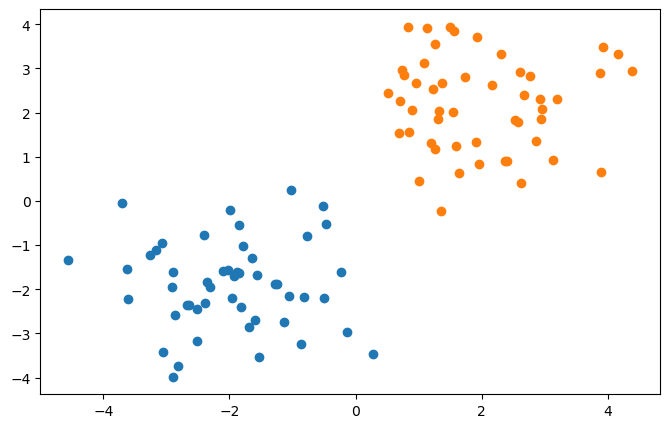

In [8]:
# Brug din k-NN funktion til at klassificere testpunkterne

#Dette her er for implementation nummer 2 (den hardcodede omstændige løsning)
#predicted_labels = knn_classify(training_points, training_labels, test_points, k=5)

#Dette her er for implementation nummer 1 (den mere kompakte rene løsning)
predicted_labels = KNN_numpy(training_points, training_labels, test_points, k=5)

# Plot resultater
plot_knn_results(training_points, training_labels, test_points, predicted_labels)

#### Opgave 2

Denne opgave handler om at teste k-NN modellen af på forskellige parametre. Her kan man både prøve at teste sig egen implementation af og/eller teste den givne implementation af.

2.1: Prøv at test forskellige værdier for training_points, training_labels, test_points, predicted_labels og k. Hvad sker der når man ændre markant på nogle af disse parametre? Hvad sker der hvis vi tilføjer mange datapunkter?

2.2: Prøv at ændre på antallet af labels

2.3: Beregn error rate af modellen. Test igen for forskellige parametre

#### Opgave 3

Denne opgave handler om at udvide k-NN modellen. Man kan tage udgangspunkt i sin egen implementation og/eller den givne implementation.

3.1: Prøv at tilføj flere labels, så der er flere end 2 og se hvad der sker

3.2: Prøv at udvid modellen med en dimension, så den går fra at være i 2 dimensioner til at være i 3 dimensioner. Dette kan være ens egen implementation, eller den der er givet. Print resultaterne i stedet for at plotte dem

3.3 Prøv at udvid modellen til n dimensioner

#### Implementation fra nettet med pakker

Her er en implementation der bruger pakken sklearn. Den er blot hentet fra nettet, så vi er ikke så meget inde i implementationen. Den er her bare for at se hvordan k-NN modellen ser ud med sklearn.

In [ ]:
# from collections import Counter
# from sklearn import datasets
# from sklearn.model_selection import train_test_split
# from matplotlib.colors import ListedColormap


# print(training_points.shape)
# print(training_labels.shape)
# print(test_points.shape)

# print(test_points[0].shape)

# print(training_points - test_points[0])

# print(float(round(np.mean(np.random.permutation(training_labels)[:10]))))

# print(float(round(-0.1)))


In [ ]:
# def euclidean_distance(x1, x2):
#     distance = np.sqrt(np.sum((x1-x2)**2))
#     return distance

# class KNN:
#     def __init__(self, k=3):
#         self.k = k

#     def fit(self, X, y):
#         self.X_train = X
#         self.y_train = y

#     def predict(self, X):
#         predictions = [self._predict(x) for x in X]
#         return predictions

#     def _predict(self, x):
#         # compute the distance
#         distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
#         # get the closest k
#         k_indices = np.argsort(distances)[:self.k]
#         k_nearest_labels = [self.y_train[i] for i in k_indices]

#         # majority voye
#         most_common = Counter(k_nearest_labels).most_common()
#         return most_common[0][0]

In [ ]:
# cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

# iris = datasets.load_iris()
# X, y = iris.data, iris.target

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# plt.figure()
# plt.scatter(X[:,2],X[:,3], c=y, cmap=cmap, edgecolor='k', s=20)
# plt.show()


# clf = KNN(k=5)
# clf.fit(X_train, y_train)
# predictions = clf.predict(X_test)

# print(predictions)

# acc = np.sum(predictions == y_test) / len(y_test)
# print(acc)

In [ ]:
# #Her kan man printe og plotte datasættet

# #print(training_points)
# plt.scatter(training_points[:,0], training_points[:,1]);
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
# plt.title('Træningsdata')
# plt.show()